In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
tickers = [
    'AAPL',  # Apple Inc. (Technology)
    'MSFT',  # Microsoft Corporation (Technology)
    'GOOGL', # Alphabet Inc. (Technology)
    'AMZN',  # Amazon.com Inc. (Consumer Discretionary)
    'TSLA',  # Tesla Inc. (Consumer Discretionary)
    'META',    # Meta Platforms Inc. (Communication Services)
    'NFLX',  # Netflix Inc. (Communication Services)
    'NVDA',  # NVIDIA Corporation (Technology)
    'JPM',   # JPMorgan Chase & Co. (Financials)
    'V',     # Visa Inc. (Financials)
    'MA',    # Mastercard Incorporated (Financials)
    'JNJ',   # Johnson & Johnson (Healthcare)
    'UNH',   # UnitedHealth Group Incorporated (Healthcare)
    'PFE',   # Pfizer Inc. (Healthcare)
    'MRK',   # Merck & Co., Inc. (Healthcare)
    'XOM',   # Exxon Mobil Corporation (Energy)
    'CVX',   # Chevron Corporation (Energy)
    'WMT',   # Walmart Inc. (Consumer Staples)
    'KO',    # The Coca-Cola Company (Consumer Staples)
    'PEP',   # PepsiCo Inc. (Consumer Staples)
    'T',     # AT&T Inc. (Telecommunications)
    'VZ',    # Verizon Communications Inc. (Telecommunications)
    'DIS',   # The Walt Disney Company (Communication Services)
    'NKE',   # Nike Inc. (Consumer Discretionary)
    'ADBE',  # Adobe Inc. (Technology)
    'INTC',  # Intel Corporation (Technology)
    'CSCO',  # Cisco Systems Inc. (Technology)
    'BA',    # Boeing Co. (Industrials)
    'CAT',   # Caterpillar Inc. (Industrials)
    'MMM',   # 3M Company (Industrials)
    'MDT',   # Medtronic plc (Healthcare)
    'LMT',   # Lockheed Martin Corporation (Aerospace & Defense)
    'TMO',   # Thermo Fisher Scientific Inc. (Healthcare)
    'AMGN',  # Amgen Inc. (Healthcare)
    'TXN',   # Texas Instruments Incorporated (Technology)
    'QCOM',  # Qualcomm Incorporated (Technology)
    'LRCX',  # Lam Research Corporation (Technology)
    'SBUX',  # Starbucks Corporation (Consumer Discretionary)
    'CHTR',  # Charter Communications Inc. (Communication Services)
    'SPGI',  # S&P Global Inc. (Financials)
    'NOW',   # ServiceNow Inc. (Technology)
    'ZM',    # Zoom Video Communications, Inc. (Communication Services)
    'VRTX',  # Vertex Pharmaceuticals Incorporated (Healthcare)
    'BIIB',  # Biogen Inc. (Healthcare)
    'GILD',  # Gilead Sciences Inc. (Healthcare)
    'NVS',   # Novartis AG (Healthcare)
    'AZN',   # AstraZeneca plc (Healthcare)
    'HSY',   # The Hershey Company (Consumer Staples)
    'MCD',   # McDonald's Corporation (Consumer Discretionary)
    'CPB',   # Campbell Soup Company (Consumer Staples)
    'AMAT',  # Applied Materials, Inc. (Technology)
    'KMB',   # Kimberly-Clark Corporation (Consumer Staples)
]

In [3]:
# Create initial dataframe

start = '2022-09-30'

df = yf.download(tickers,start)

df = df.stack().reset_index()

columns = {column: column.replace(' ', '_').lower() for column in df.columns}

df = df.rename(columns=columns)

df = df.sort_values(['ticker', 'date'])

df = df.reset_index(drop=True)

df

[********              17%                       ]  9 of 52 completedCould not get exchangeTimezoneName for ticker 'LRCX' reason: 'chart'
[*********************100%***********************]  52 of 52 completed

1 Failed download:
['LRCX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
/var/folders/5k/s9c0d19s0k7byf19zlnzgmjr0000gn/T/ipykernel_48222/3730181472.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack().reset_index()


Price,date,ticker,adj_close,close,high,low,open,volume
0,2022-09-30 00:00:00+00:00,AAPL,136.685547,138.199997,143.100006,138.000000,141.279999,124925300.0
1,2022-10-03 00:00:00+00:00,AAPL,140.888962,142.449997,143.070007,137.690002,138.210007,114311700.0
2,2022-10-04 00:00:00+00:00,AAPL,144.498978,146.100006,146.220001,144.259995,145.029999,87830100.0
3,2022-10-05 00:00:00+00:00,AAPL,144.795685,146.399994,147.380005,143.009995,144.070007,79471000.0
4,2022-10-06 00:00:00+00:00,AAPL,143.836319,145.429993,147.539993,145.220001,145.809998,68402200.0
...,...,...,...,...,...,...,...,...
26714,2024-10-24 00:00:00+00:00,ZM,72.660004,72.660004,73.989998,72.360001,72.739998,2926700.0
26715,2024-10-25 00:00:00+00:00,ZM,72.629997,72.629997,73.750000,72.610001,72.779999,2073300.0
26716,2024-10-28 00:00:00+00:00,ZM,73.849998,73.849998,74.160004,72.678001,72.930000,2129800.0
26717,2024-10-29 00:00:00+00:00,ZM,75.500000,75.500000,75.959999,73.650002,73.849998,3569300.0


In [4]:
# Generate features

df['ret'] = df.groupby('ticker')['adj_close'].pct_change()
df['log_ret'] = np.log(1+df['ret'])

for t in [50,100,150]:
    df[f'ret_{t}'] = df.groupby('ticker')['log_ret'].rolling(t,t).sum().reset_index(drop=True)
    df[f'ret_{t}'] = df.groupby('ticker')[f'ret_{t}'].shift(1)

df = df.dropna().reset_index(drop=True)

df

Price,date,ticker,adj_close,close,high,low,open,volume,ret,log_ret,ret_50,ret_100,ret_150
0,2023-05-09 00:00:00+00:00,AAPL,170.429321,171.770004,173.539993,171.600006,173.050003,45326900.0,-0.009971,-0.010021,0.167720,0.184493,0.230659
1,2023-05-10 00:00:00+00:00,AAPL,172.205338,173.559998,174.029999,171.899994,173.020004,53724500.0,0.010421,0.010367,0.149485,0.167712,0.190349
2,2023-05-11 00:00:00+00:00,AAPL,172.393845,173.750000,174.589996,172.169998,173.850006,49514700.0,0.001095,0.001094,0.163305,0.193737,0.175415
3,2023-05-12 00:00:00+00:00,AAPL,171.459900,172.570007,174.059998,171.000000,173.619995,45497800.0,-0.005418,-0.005432,0.178748,0.242819,0.174458
4,2023-05-15 00:00:00+00:00,AAPL,170.963135,172.070007,173.210007,171.470001,173.160004,37266700.0,-0.002897,-0.002901,0.169195,0.252072,0.175673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,2024-10-24 00:00:00+00:00,ZM,72.660004,72.660004,73.989998,72.360001,72.739998,2926700.0,0.001654,0.001653,0.247246,0.167706,0.081537
19014,2024-10-25 00:00:00+00:00,ZM,72.629997,72.629997,73.750000,72.610001,72.779999,2073300.0,-0.000413,-0.000413,0.242740,0.163021,0.087988
19015,2024-10-28 00:00:00+00:00,ZM,73.849998,73.849998,74.160004,72.678001,72.930000,2129800.0,0.016797,0.016658,0.227525,0.165853,0.096330
19016,2024-10-29 00:00:00+00:00,ZM,75.500000,75.500000,75.959999,73.650002,73.849998,3569300.0,0.022343,0.022097,0.240387,0.173451,0.101681


In [5]:
pivot = df[['date', 'ticker', 'ret']]
pivot = pivot.pivot(index='date', columns='ticker', values='ret')
pivot = pivot.dropna(axis=1, how='any') # Get rid of stocks that are too young

columns = pivot.columns

scaler = StandardScaler()
scaled_pivot = scaler.fit_transform(pivot)
scaled_pivot = pd.DataFrame(columns=columns, data=scaled_pivot)

mse_matrix = pd.DataFrame(index=columns, columns=columns)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for a in columns:
    for b in columns:
        mse = compute_mse(scaled_pivot[a], scaled_pivot[b])
        mse_matrix.loc[a, b] = mse

mse_matrix = mse_matrix.astype(float)

mse_matrix.head()

ticker,ADBE,AMAT,AMGN,AZN,BA,BIIB,CAT,CHTR,CPB,CSCO,...,SPGI,T,TMO,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
ADBE,0.000000,1.312739,1.734652,1.905992,1.806438,1.778056,1.711628,1.704213,2.163422,1.420455,...,1.402385,2.200716,1.686522,1.957171,1.390187,1.716788,2.113615,1.859299,2.125036,1.401953
AMAT,1.312739,0.000000,1.763965,1.961263,1.584208,1.701222,1.248966,1.781746,2.469432,1.617983,...,1.641758,2.417489,1.647744,2.090803,1.625262,1.818253,2.260529,2.013056,2.027358,1.581735
AMGN,1.734652,1.763965,0.000000,1.582860,1.854256,1.230505,1.548902,1.506428,1.816452,1.531761,...,1.428895,1.697827,1.413651,1.789637,1.670420,1.428991,1.748925,1.666658,1.829031,1.932119
AZN,1.905992,1.961263,1.582860,0.000000,1.796200,1.428362,1.801950,1.825699,1.824596,1.788882,...,1.331692,1.650601,1.365972,1.693369,1.717397,1.512336,1.675486,1.712374,1.884973,1.799391
BA,1.806438,1.584208,1.854256,1.796200,0.000000,1.723068,1.522405,1.726972,2.226652,1.733732,...,1.638852,1.965080,1.757570,1.924608,1.782363,1.872274,1.963757,1.786185,1.707566,1.552518


In [6]:
corr = pivot.corr()

corr.head()

ticker,ADBE,AMAT,AMGN,AZN,BA,BIIB,CAT,CHTR,CPB,CSCO,...,SPGI,T,TMO,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
ADBE,1.000000,0.343630,0.132674,0.047004,0.096781,0.110972,0.144186,0.147894,-0.081711,0.289772,...,0.298807,-0.100358,0.156739,0.021414,0.304906,0.141606,-0.056808,0.070350,-0.062518,0.299023
AMAT,0.343630,1.000000,0.118017,0.019369,0.207896,0.149389,0.375517,0.109127,-0.234716,0.191009,...,0.179121,-0.208744,0.176128,-0.045401,0.187369,0.090873,-0.130265,-0.006528,-0.013679,0.209132
AMGN,0.132674,0.118017,1.000000,0.208570,0.072872,0.384747,0.225549,0.246786,0.091774,0.234120,...,0.285553,0.151087,0.293174,0.105182,0.164790,0.285505,0.125538,0.166671,0.085484,0.033941
AZN,0.047004,0.019369,0.208570,1.000000,0.101900,0.285819,0.099025,0.087150,0.087702,0.105559,...,0.334154,0.174699,0.317014,0.153315,0.141301,0.243832,0.162257,0.143813,0.057514,0.100304
BA,0.096781,0.207896,0.072872,0.101900,1.000000,0.138466,0.238798,0.136514,-0.113326,0.133134,...,0.180574,0.017460,0.121215,0.037696,0.108819,0.063863,0.018122,0.106907,0.146217,0.223741


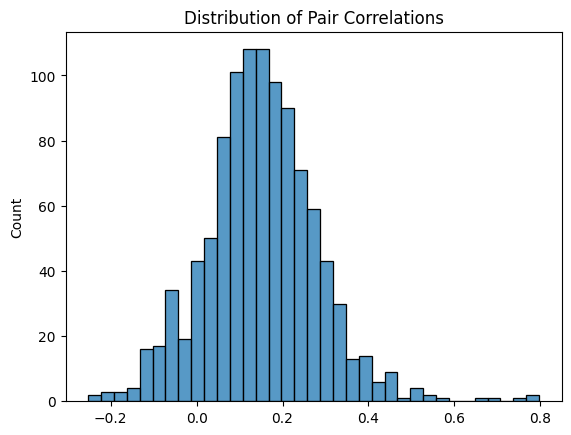

In [7]:
tri = np.triu(corr)

vals = tri[np.nonzero(tri)]
vals = vals[vals != 1]

sns.histplot(vals)
plt.title("Distribution of Pair Correlations")
plt.show()

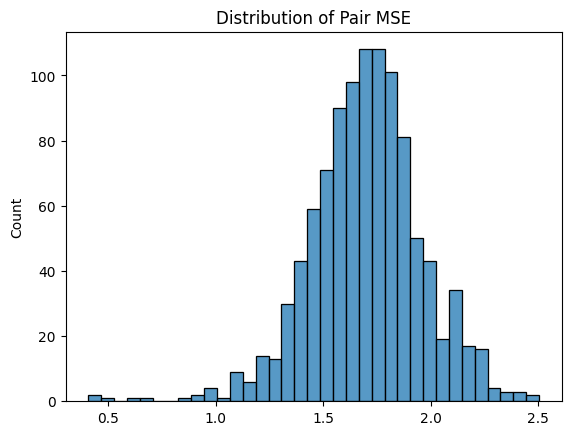

In [8]:
tri = np.triu(mse_matrix)

vals = tri[np.nonzero(tri)]
vals = vals[vals != 1]

sns.histplot(vals)
plt.title("Distribution of Pair MSE")
plt.show()

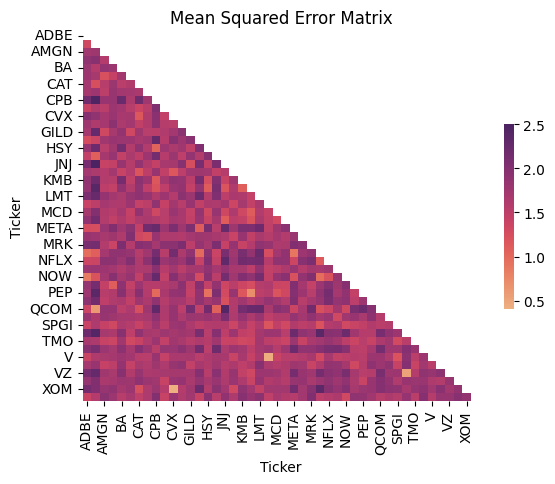

In [9]:
mask = np.triu(np.ones_like(mse_matrix, dtype=bool))

sns.heatmap(mse_matrix, mask=mask, cmap='flare', cbar_kws={"shrink": .5})
plt.title("Mean Squared Error Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

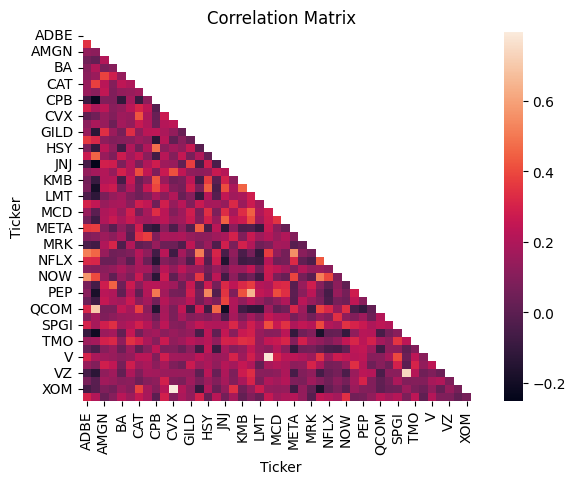

In [10]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask)
plt.title("Correlation Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

In [11]:
# Clustering
# The aggregate dataframe represents the last day of the df dataframe

aggregate = df.groupby('ticker').agg({'ret_50':'last', 'ret_100': 'last', 'ret_150': 'last'})

aggregate.head()

Price,ret_50,ret_100,ret_150
ticker,,,
AAPL,0.031997,0.176459,0.314480
ADBE,-0.148540,0.057800,-0.044741
AMAT,-0.102004,-0.151981,-0.079732
AMGN,-0.037180,0.040109,0.128667
AMZN,0.062026,0.038471,0.047170


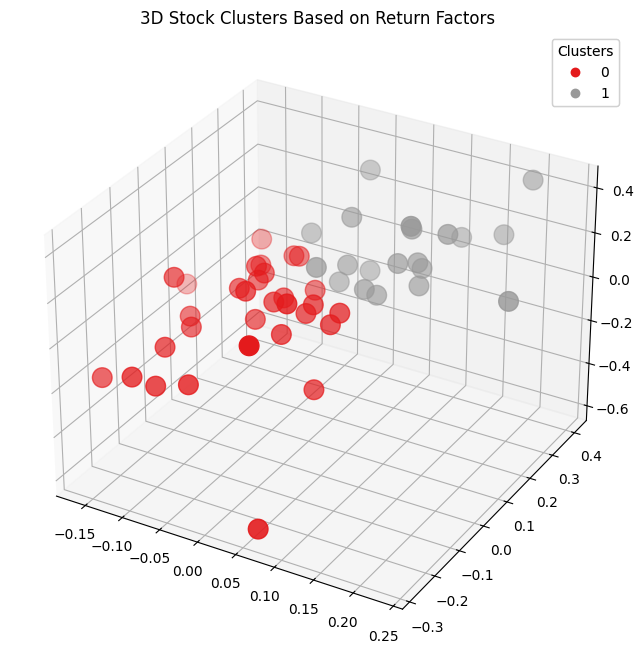

In [12]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregate)

n_clusters = 2 # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
aggregate['Cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregate['ret_50'], aggregate['ret_100'], aggregate['ret_150'], c=aggregate['Cluster'], s=200, cmap='Set1')

ax.set_title('3D Stock Clusters Based on Return Factors')
# ax.set_xlabel('50 Day Return')
# ax.set_ylabel('100 Day Return')
# ax.set_zlabel('150 Day Return')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()